# Boston Housing Dataset

### This notebook is not to implement feature engineering 

This data was originally a part of UCI Machine Learning Repository and has been removed now. This data also ships with the scikit-learn library. There are 506 samples and 13 feature variables in this data-set. The objective is to predict the value of prices of the house using the given features.

The description of all the features is given below:

**CRIM**: Per capita crime rate by town

**ZN**: Proportion of residential land zoned for lots over 25,000 sq. ft

**INDUS**: Proportion of non-retail business acres per town

**CHAS**: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

**NOX**: Nitric oxide concentration (parts per 10 million)

**RM**: Average number of rooms per dwelling

**AGE**: Proportion of owner-occupied units built prior to 1940

**DIS**: Weighted distances to five Boston employment centers

**RAD**: Index of accessibility to radial highways

**TAX**: Full-value property tax rate per $10,000

**B**: 1000(Bk - 0.63)², where Bk is the proportion of [people of African American descent] by town

**LSTAT**: Percentage of lower status of the population

**MEDV**: Median value of owner-occupied homes in $1000s

In [126]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline

In [127]:
from sklearn.datasets import load_boston

boston_dataset = load_boston()

In [128]:
print(boston_dataset.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


* data: contains the information for various houses
* target: prices of the house
* feature_names: names of the features
* DESCR describes the dataset

In [129]:
boston = pd.DataFrame(boston_dataset.data, columns = boston_dataset.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


The target value MEDV is missing from the data. Create a new column of target values and add it to the dataframe.

In [130]:
boston['MEDV'] = boston_dataset.target

In [131]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


See if are any missing values in the data

In [132]:
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

**Exploratory Data Analysis** is a very important step before training the model.

In [133]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<AxesSubplot:>

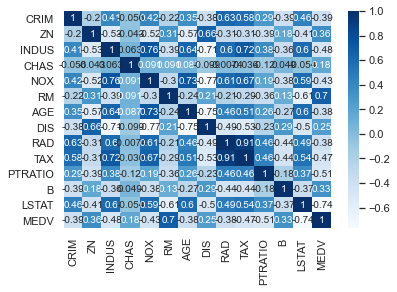

In [134]:
correlation_matrix = boston.corr()
sns.heatmap(data = correlation_matrix, annot = True, cmap="Blues")

The correlation coefficient ranges from -1 to 1. If the value is close to 1, it means that the there is a strong positive correlation between the two variables. When it is close to -1, the variables have a strong negative correlation

**observations:**

To fit a linear regression model, select those features which have a high correlation with the target variable **MEDV**. **RM(rooms)** has a strong positive correlation(0.7) and LSTAT(lower population) has a strong negative correlation(-0.74).

An important point in selecting features for a linear regression model is to check for multi-co-linearity. The features **RAD**, **TAX** have a correlation of **0.91**. These feature pairs are storongly correlated to each other. Shouldn not select both these features together for training the model. Same goes for the features **DIS** and **AGE** which have a correlation of **-0.75**.

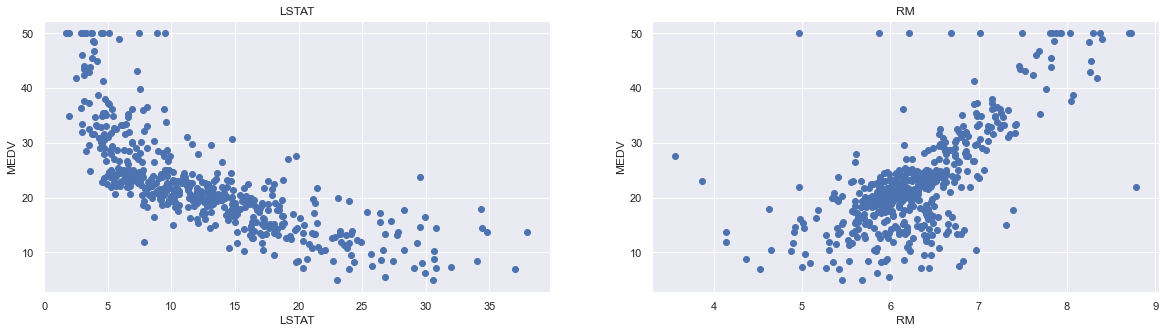

In [135]:
plt.figure(figsize = (20, 5))

features = ['LSTAT', 'RM']
target = boston['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features), i + 1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker = 'o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

**Observations:**

* The prices increase as the value of RM increases linearly. There are few outliers and the data seems to be capped at 50.
* The prices tend to decrease with an increase in LSTAT. Though it doesn'n look to be following exactly a linear line.

Concatenate the LSTAT and RM columns using np.c_ provided by the numpy library.

In [136]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [137]:
boston_df = boston.drop(["MEDV"], axis = 1)
X = boston_df
Y = boston_dataset.target

In [138]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [139]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 14)
(102, 14)
(404,)
(102,)


#### What's going on when use train_test_split

In [148]:
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [163]:
train_set_X, test_set_X = split_train_test(X, 0.2)

In [164]:
print(train_set_X.shape)
print(test_set_X.shape)

(405, 13)
(101, 13)


In [141]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

LinearRegression()

In [145]:
lin_model.intercept_, lin_model.coef_

(30.246750993923865,
 array([-1.13055924e-01,  3.01104641e-02,  4.03807204e-02,  2.78443820e+00,
        -1.72026334e+01,  4.43883520e+00, -6.29636221e-03, -1.44786537e+00,
         2.62429736e-01, -1.06467863e-02, -9.15456240e-01,  1.23513347e-02,
        -5.08571424e-01]))

intercept_ is the bias term, coef_ is the feature weights

In [142]:
lin_model.score(X_test, y_test)

0.668759493535633

In [144]:
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = r2_score(y_train, y_train_predict)

print("The model performance for training set")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

print('\n')

y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2 = r2_score(y_test, y_test_predict)

print("The mode performance for test set")
print('RMSE is {}'.format(rmse))
print('rs score is {}'.format(r2))

The model performance for training set
RMSE is 4.6520331848801675
R2 score is 0.7508856358979672


The mode performance for test set
RMSE is 4.928602182665329
rs score is 0.668759493535633


#### What is variance?
In terms of linear regression, variance is a measure of how far observed values differ from the avarage of predicted values

#### What is r2 score?
"(total variance explained by model) / total variance" So if it is 100%, the two variables are perfectly correlated, with no variance at all. A low value would show a low level of correlation, meaning a regression model that is not valid, but not in all cases.

#### What is mean square error(MSE)?
Mean square error is the avarage of the square of the errors. The larger the number the larger the error. Error means the difference between the observed values and the predicted ones.